# Garbage Classification

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as signalpy
import tensorflow as tf
from PIL import Image
import keras_tuner as kt
import kagglehub
import shutil

c:\Users\Ema\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Useful Functions

In [2]:
def count_images_in_folder(folder_path, image_extensions=(".jpg", ".jpeg", ".png", ".gif", ".bmp")):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(image_extensions):  # Check for valid image extensions
            count += 1
    return count

def count_jpg_images_in_folder(folder_path, image_extensions=(".jpg")):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(image_extensions):  # Check for valid image extensions
            count += 1
    return count

def load_image_and_label(image_path , label) :
    image_string = tf.io.read_file(image_path)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image_decoded.set_shape([224, 224, 3])   
    return image_decoded, label

## Data Preprocessing

### Download the datasets and move them to the repo folder

In [3]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# kaggle_default_dataset_1_path = kagglehub.dataset_download("farzadnekouei/trash-type-image-dataset")
# print("Path to dataset 1 files :", kaggle_default_dataset_1_path)
# kaggle_default_dataset_2_path = kagglehub.dataset_download("mostafaabla/garbage-classification")
# print("Path to dataset 2 files :", kaggle_default_dataset_2_path)

In [4]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# kaggle_default_dataset_1_waste_categories_path = os.path.join(kaggle_default_dataset_1_path, 'TrashType_Image_Dataset')
# kaggle_default_dataset_2_waste_categories_path = os.path.join(kaggle_default_dataset_2_path, 'garbage_classification')

In [5]:
dataset_parent_folder_path = os.path.join(os.getcwd(),'Dataset')
dataset_1_path = os.path.join(dataset_parent_folder_path, 'Dataset 1')
dataset_2_path = os.path.join(dataset_parent_folder_path, 'Dataset 2')
os.makedirs(dataset_parent_folder_path, exist_ok=True)
os.makedirs(dataset_1_path, exist_ok=True)
os.makedirs(dataset_2_path, exist_ok=True)

In [6]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# shutil.copytree(kaggle_default_dataset_1_waste_categories_path, dataset_1_path, dirs_exist_ok=True)
# shutil.rmtree(kaggle_default_dataset_1_path)
# shutil.copytree(kaggle_default_dataset_2_waste_categories_path, dataset_2_path, dirs_exist_ok=True)
# shutil.rmtree(kaggle_default_dataset_2_path)

### Give a generic structure to the dataset

Waste Types Folders :
1. general_waste
2. paper_waste
3. plastic_waste
4. metal_waste
5. textile_waste
6. electronic_waste
7. glass_waste

#### Dataset 1 modifications

In [7]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# if os.path.exists(os.path.join(dataset_1_path, 'glass')) and not os.path.exists(os.path.join(dataset_1_path, 'glass_waste')) :
#     os.replace(os.path.join(dataset_1_path, 'glass'), os.path.join(dataset_1_path, 'glass_waste'))
# if os.path.exists(os.path.join(dataset_1_path, 'metal')) and not os.path.exists(os.path.join(dataset_1_path, 'metal_waste')) :
#     os.rename(os.path.join(dataset_1_path, 'metal'), os.path.join(dataset_1_path, 'metal_waste'))
# if os.path.exists(os.path.join(dataset_1_path, 'paper')) and not os.path.exists(os.path.join(dataset_1_path, 'paper_waste')) :
#     os.rename(os.path.join(dataset_1_path, 'paper'), os.path.join(dataset_1_path, 'paper_waste'))
# if os.path.exists(os.path.join(dataset_1_path, 'plastic')) and not os.path.exists(os.path.join(dataset_1_path, 'plastic_waste')) :
#     os.rename(os.path.join(dataset_1_path, 'plastic'), os.path.join(dataset_1_path, 'plastic_waste'))
# if os.path.exists(os.path.join(dataset_1_path, 'trash')) and not os.path.exists(os.path.join(dataset_1_path, 'general_waste')) :
#     os.rename(os.path.join(dataset_1_path, 'trash'), os.path.join(dataset_1_path, 'general_waste'))

# if os.path.exists(os.path.join(dataset_1_path, 'cardboard')) :
#     shutil.copytree(os.path.join(dataset_1_path, 'cardboard'), os.path.join(dataset_1_path, 'paper_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_1_path, 'cardboard'))

dataset_1_general_waste_path = os.path.join(dataset_1_path, 'general_waste')
dataset_1_glass_waste_path = os.path.join(dataset_1_path, 'glass_waste')
dataset_1_metal_waste_path = os.path.join(dataset_1_path, 'metal_waste')
dataset_1_paper_waste_path = os.path.join(dataset_1_path, 'paper_waste')
dataset_1_plastic_waste_path = os.path.join(dataset_1_path, 'plastic_waste')

#### Dataset 2 modifications

In [8]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# if os.path.exists(os.path.join(dataset_2_path, 'battery')) and not os.path.exists(os.path.join(dataset_2_path, 'electronic_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'battery'), os.path.join(dataset_2_path, 'electronic_waste'))

# if os.path.exists(os.path.join(dataset_2_path, 'trash')) and not os.path.exists(os.path.join(dataset_2_path, 'general_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'trash'), os.path.join(dataset_2_path, 'general_waste'))

# if os.path.exists(os.path.join(dataset_2_path, 'metal')) and not os.path.exists(os.path.join(dataset_2_path, 'metal_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'metal'), os.path.join(dataset_2_path, 'metal_waste'))

# if os.path.exists(os.path.join(dataset_2_path, 'paper')) and not os.path.exists(os.path.join(dataset_2_path, 'paper_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'paper'), os.path.join(dataset_2_path, 'paper_waste'))

# if os.path.exists(os.path.join(dataset_2_path, 'plastic')) and not os.path.exists(os.path.join(dataset_2_path, 'plastic_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'plastic'), os.path.join(dataset_2_path, 'plastic_waste'))

# os.makedirs(os.path.join(dataset_2_path, 'glass_waste'), exist_ok=True)
# os.makedirs(os.path.join(dataset_2_path, 'textile_waste'), exist_ok=True)

# if os.path.exists(os.path.join(dataset_2_path, 'biological')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'biological'), os.path.join(dataset_2_path, 'general_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'biological'))

# if os.path.exists(os.path.join(dataset_2_path, 'brown-glass')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'brown-glass'), os.path.join(dataset_2_path, 'glass_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'brown-glass'))

# if os.path.exists(os.path.join(dataset_2_path, 'green-glass')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'green-glass'), os.path.join(dataset_2_path, 'glass_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'green-glass'))

# if os.path.exists(os.path.join(dataset_2_path, 'white-glass')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'white-glass'), os.path.join(dataset_2_path, 'glass_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'white-glass'))

# if os.path.exists(os.path.join(dataset_2_path, 'shoes')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'shoes'), os.path.join(dataset_2_path, 'textile_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'shoes'))

# if os.path.exists(os.path.join(dataset_2_path, 'clothes')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'clothes'), os.path.join(dataset_2_path, 'textile_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'clothes'))

# if os.path.exists(os.path.join(dataset_2_path, 'cardboard')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'cardboard'), os.path.join(dataset_2_path, 'paper_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'cardboard'))

dataset_2_electronic_waste_path = os.path.join(dataset_2_path, 'electronic_waste')
dataset_2_general_waste_path = os.path.join(dataset_2_path, 'general_waste')
dataset_2_glass_waste_path = os.path.join(dataset_2_path, 'glass_waste')
dataset_2_metal_waste_path = os.path.join(dataset_2_path, 'metal_waste')
dataset_2_paper_waste_path = os.path.join(dataset_2_path, 'paper_waste')
dataset_2_plastic_waste_path = os.path.join(dataset_2_path, 'plastic_waste')
dataset_2_textile_waste_path = os.path.join(dataset_2_path, 'textile_waste')

#### Final Dataset modifications

In [9]:
final_dataset_path = os.path.join(dataset_parent_folder_path, "Final_Dataset")
final_dataset_general_waste_path = os.path.join(final_dataset_path, "general_waste")
final_dataset_paper_waste_path = os.path.join(final_dataset_path, "paper_waste")
final_dataset_plastic_waste_path = os.path.join(final_dataset_path, "plastic_waste")
final_dataset_metal_waste_path = os.path.join(final_dataset_path, "metal_waste")
final_dataset_textile_waste_path = os.path.join(final_dataset_path, "textile_waste")
final_dataset_electronic_waste_path = os.path.join(final_dataset_path, "electronic_waste")
final_dataset_glass_waste_path = os.path.join(final_dataset_path, "glass_waste")
os.makedirs(final_dataset_path, exist_ok=True)
os.makedirs(final_dataset_general_waste_path, exist_ok=True)
os.makedirs(final_dataset_paper_waste_path, exist_ok=True)
os.makedirs(final_dataset_plastic_waste_path, exist_ok=True)
os.makedirs(final_dataset_metal_waste_path, exist_ok=True)
os.makedirs(final_dataset_textile_waste_path, exist_ok=True)
os.makedirs(final_dataset_electronic_waste_path, exist_ok=True)
os.makedirs(final_dataset_glass_waste_path, exist_ok=True)

# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# if os.path.exists(final_dataset_electronic_waste_path) and os.path.exists(dataset_2_electronic_waste_path) :
#     for item in os.listdir(final_dataset_electronic_waste_path) :
#         item_path = os.path.join(final_dataset_electronic_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_2_electronic_waste_path, final_dataset_electronic_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_general_waste_path) and os.path.exists(dataset_1_general_waste_path) and os.path.exists(dataset_2_general_waste_path) :
#     for item in os.listdir(final_dataset_general_waste_path) :
#         item_path = os.path.join(final_dataset_general_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_general_waste_path, final_dataset_general_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_general_waste_path, final_dataset_general_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_glass_waste_path) and os.path.exists(dataset_1_glass_waste_path) and os.path.exists(dataset_2_glass_waste_path) :
#     for item in os.listdir(final_dataset_glass_waste_path) :
#         item_path = os.path.join(final_dataset_glass_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_glass_waste_path, final_dataset_glass_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_glass_waste_path, final_dataset_glass_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_metal_waste_path) and os.path.exists(dataset_1_metal_waste_path) and os.path.exists(dataset_2_metal_waste_path) :
#     for item in os.listdir(final_dataset_metal_waste_path) :
#         item_path = os.path.join(final_dataset_metal_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_metal_waste_path, final_dataset_metal_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_metal_waste_path, final_dataset_metal_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_paper_waste_path) and os.path.exists(dataset_1_paper_waste_path) and os.path.exists(dataset_2_paper_waste_path) :
#     for item in os.listdir(final_dataset_paper_waste_path) :
#         item_path = os.path.join(final_dataset_paper_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_paper_waste_path, final_dataset_paper_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_paper_waste_path, final_dataset_paper_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_plastic_waste_path) and os.path.exists(dataset_1_plastic_waste_path) and os.path.exists(dataset_2_plastic_waste_path) :
#     for item in os.listdir(final_dataset_plastic_waste_path) :
#         item_path = os.path.join(final_dataset_plastic_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_plastic_waste_path, final_dataset_plastic_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_plastic_waste_path, final_dataset_plastic_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_textile_waste_path) and os.path.exists(dataset_2_textile_waste_path) :
#     for item in os.listdir(final_dataset_textile_waste_path) :
#         item_path = os.path.join(final_dataset_textile_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_2_textile_waste_path, final_dataset_textile_waste_path, dirs_exist_ok=True)

#### Waste types data comparison

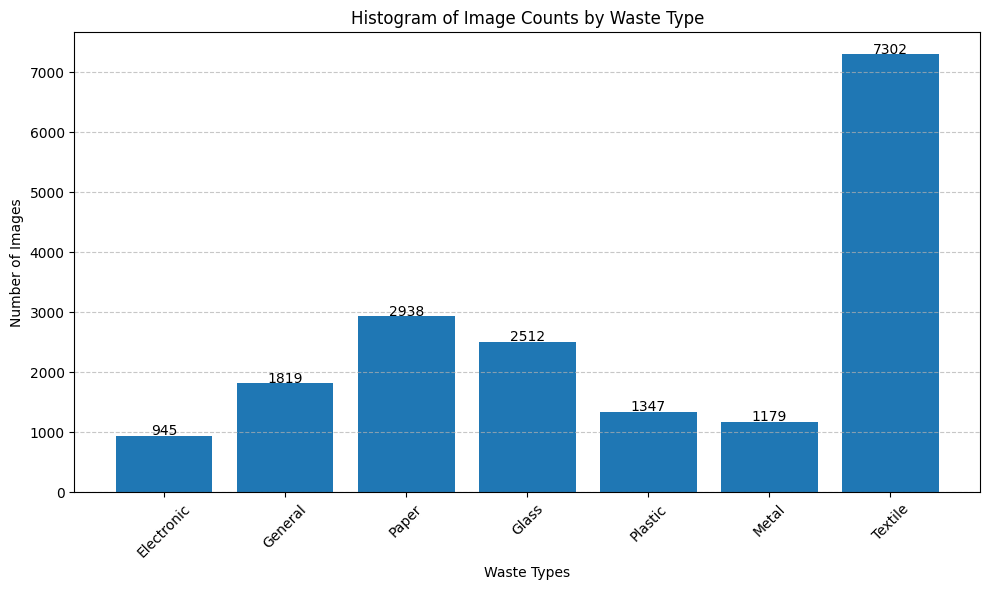

In [10]:
waste_types = ["Electronic", "General", "Paper", "Glass", "Plastic", "Metal", "Textile"]
electronic_waste_image_count = count_images_in_folder(final_dataset_electronic_waste_path)
general_waste_image_count = count_images_in_folder(final_dataset_general_waste_path)
paper_waste_image_count = count_images_in_folder(final_dataset_paper_waste_path)
glass_waste_image_count = count_images_in_folder(final_dataset_glass_waste_path)
plastic_waste_image_count = count_images_in_folder(final_dataset_plastic_waste_path)
metal_waste_image_count = count_images_in_folder(final_dataset_metal_waste_path)
textile_waste_image_count = count_images_in_folder(final_dataset_textile_waste_path)

image_counts = [electronic_waste_image_count, general_waste_image_count, paper_waste_image_count, glass_waste_image_count, plastic_waste_image_count, metal_waste_image_count, textile_waste_image_count]

plt.figure(figsize=(10,6))
bars = plt.bar(waste_types, image_counts)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             str(bar.get_height()), ha='center', fontsize=10)
    
# Adding labels and title
plt.xlabel("Waste Types")
plt.ylabel("Number of Images")
plt.title("Histogram of Image Counts by Waste Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### Prepare the data pipeline

In [11]:
electronic_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_electronic_waste_path + '/*.jpg')
general_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_general_waste_path + '/*.jpg')
glass_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_glass_waste_path + '/*.jpg')
metal_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_metal_waste_path + '/*.jpg')
paper_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_paper_waste_path + '/*.jpg')
plastic_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_plastic_waste_path + '/*.jpg')
textile_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_textile_waste_path + '/*.jpg')

In [12]:
print(electronic_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(general_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(glass_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(metal_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(paper_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(plastic_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(textile_waste_tf_dataset_without_labels.as_numpy_iterator().next())

b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\electronic_waste\\battery101.jpg'
b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\general_waste\\biological490.jpg'
b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\glass_waste\\green-glass183.jpg'
b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\metal_waste\\metal_174.jpg'
b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\paper_waste\\paper503.jpg'
b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\plastic_waste\\plastic350.jpg'
b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\textile_waste\\clothes3825.jpg'


In [13]:
electronic_waste_tf_dataset_with_labels = tf.data.Dataset.zip((electronic_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.zeros(len(electronic_waste_tf_dataset_without_labels), dtype=tf.int32))))
general_waste_tf_dataset_with_labels = tf.data.Dataset.zip((general_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.ones(len(general_waste_tf_dataset_without_labels), dtype=tf.int32))))
glass_waste_tf_dataset_with_labels = tf.data.Dataset.zip(glass_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(glass_waste_tf_dataset_without_labels)], 2)))
metal_waste_tf_dataset_with_labels = tf.data.Dataset.zip(metal_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(metal_waste_tf_dataset_without_labels)], 3)))
paper_waste_tf_dataset_with_labels = tf.data.Dataset.zip(paper_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(paper_waste_tf_dataset_without_labels)], 4)))
plastic_waste_tf_dataset_with_labels = tf.data.Dataset.zip(plastic_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(plastic_waste_tf_dataset_without_labels)], 5)))
textile_waste_tf_dataset_with_labels = tf.data.Dataset.zip(textile_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(textile_waste_tf_dataset_without_labels)], 6)))

In [14]:
print(electronic_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(general_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(glass_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(metal_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(paper_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(plastic_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(textile_waste_tf_dataset_with_labels.as_numpy_iterator().next())

(b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\electronic_waste\\battery407.jpg', 0)
(b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\general_waste\\trash392.jpg', 1)
(b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\glass_waste\\green-glass491.jpg', 2)
(b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\metal_waste\\metal187.jpg', 3)
(b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\paper_waste\\cardboard763.jpg', 4)
(b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\plastic_waste\\plastic_425.jpg', 5)
(b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\textile_waste\\shoes1105.jpg', 6)


In [15]:
waste_classification_dataset = electronic_waste_tf_dataset_with_labels.concatenate(general_waste_tf_dataset_with_labels).concatenate(glass_waste_tf_dataset_with_labels).concatenate(metal_waste_tf_dataset_with_labels).concatenate(paper_waste_tf_dataset_with_labels).concatenate(plastic_waste_tf_dataset_with_labels).concatenate(textile_waste_tf_dataset_with_labels)

In [16]:
print(waste_classification_dataset.as_numpy_iterator().next())
len(waste_classification_dataset)

(b'd:\\GitHub\\GarbageClassification\\Dataset\\Final_Dataset\\electronic_waste\\battery219.jpg', 0)


18042

##### Shuffling the dataset. Otherwise, the training/testing data will be unbalanced (the labels are in order)

In [17]:
waste_classification_dataset = waste_classification_dataset.shuffle(len(waste_classification_dataset), seed=100, reshuffle_each_iteration=False)
labels_array = []
for sample, label in waste_classification_dataset.as_numpy_iterator() :
    labels_array.append(label)

print(labels_array)

[2, 6, 5, 2, 6, 0, 6, 1, 6, 6, 4, 2, 5, 6, 5, 1, 6, 4, 4, 4, 6, 6, 2, 6, 6, 5, 6, 4, 2, 6, 2, 2, 6, 4, 6, 6, 2, 6, 6, 3, 2, 0, 6, 6, 5, 6, 6, 6, 6, 4, 6, 6, 4, 6, 2, 1, 5, 6, 6, 6, 2, 2, 5, 2, 6, 6, 6, 6, 4, 6, 1, 6, 6, 6, 3, 3, 6, 2, 6, 6, 2, 3, 1, 6, 6, 2, 6, 6, 2, 6, 6, 6, 4, 6, 6, 4, 6, 6, 4, 6, 6, 6, 4, 6, 2, 6, 6, 6, 2, 4, 2, 6, 2, 6, 4, 4, 6, 6, 2, 4, 3, 6, 6, 4, 6, 6, 6, 1, 6, 4, 6, 4, 6, 6, 6, 6, 3, 4, 6, 2, 6, 2, 2, 5, 1, 5, 2, 3, 6, 6, 6, 2, 6, 5, 4, 6, 6, 6, 6, 5, 4, 2, 5, 6, 6, 2, 1, 6, 6, 6, 3, 2, 6, 4, 2, 4, 6, 6, 6, 5, 6, 6, 6, 2, 6, 0, 6, 6, 6, 1, 1, 1, 6, 4, 1, 4, 4, 2, 6, 1, 4, 1, 6, 3, 2, 2, 6, 0, 6, 4, 6, 3, 4, 6, 6, 6, 1, 6, 4, 5, 6, 2, 1, 4, 6, 0, 4, 4, 2, 1, 2, 2, 4, 6, 6, 6, 5, 6, 0, 6, 6, 6, 6, 2, 6, 6, 0, 6, 4, 3, 6, 2, 6, 6, 4, 4, 6, 6, 1, 2, 6, 4, 4, 6, 6, 0, 6, 2, 6, 1, 4, 2, 6, 6, 6, 6, 1, 6, 4, 6, 1, 2, 6, 5, 6, 4, 5, 5, 6, 3, 1, 6, 6, 4, 4, 2, 6, 5, 5, 1, 4, 1, 3, 2, 6, 6, 4, 2, 6, 6, 6, 3, 6, 5, 4, 4, 6, 6, 6, 6, 1, 0, 6, 6, 6, 4, 4, 6, 6, 1, 3, 6, 0, 

In [18]:
training_data = waste_classification_dataset.take(len(waste_classification_dataset)*7//10)
validation_data = waste_classification_dataset.skip(len(training_data)).take(len(waste_classification_dataset)*15//100)
testing_data = waste_classification_dataset.skip(len(training_data)+len(validation_data)).take(len(waste_classification_dataset)-len(training_data)-len(validation_data))

### AR TREBUI SA FOLOSIM tf.keras.applications.resnet.preprocess_input ????

In [ ]:
# ?????

In [ ]:
print(len(training_data))
print(len(validation_data))
print(len(testing_data))

In [ ]:
labels_array = []
for sample, label in training_data.as_numpy_iterator() :
    labels_array.append(label)
print(labels_array)

In [ ]:
labels_array = []
for sample, label in validation_data.as_numpy_iterator() :
    labels_array.append(label)
print(labels_array)

In [ ]:
labels_array = []
for sample, label in testing_data.as_numpy_iterator() :
    labels_array.append(label)
print(labels_array)

In [ ]:
training_data = training_data.map(load_image_and_label)
training_data = training_data.cache()
training_data = training_data.batch(32)
training_data = training_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
testing_data = testing_data.map(load_image_and_label)
testing_data = testing_data.cache()
testing_data = testing_data.batch(32)
testing_data = testing_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
validation_data = validation_data.map(load_image_and_label)
validation_data = validation_data.cache()
validation_data = validation_data.batch(32)
validation_data = validation_data.prefetch(tf.data.AUTOTUNE)

#### Testing one batch of the datasets

In [ ]:
samples , labels = training_data.as_numpy_iterator().next()
print(samples.shape)
print(labels)

In [ ]:
samples , labels = testing_data.as_numpy_iterator().next()
print(samples.shape)
print(labels)

In [ ]:
samples , labels = validation_data.as_numpy_iterator().next()
print(samples.shape)
print(labels)

In [ ]:
samples_shape_array = []
for samples, labels in training_data.as_numpy_iterator() :
    samples_shape_array.append(str(samples.shape))
samples_shape_array